# On the book website, www.statlearning.com, there is a gene expression data set (Ch12Ex13.csv) that consists of 40 tissue samples with measurements on 1,000 genes. The first 20 samples are from healthy patients, while the second 20 are from a diseased group.

In [29]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import (KMeans, AgglomerativeClustering)
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import dendrogram
from ISLP.cluster import compute_linkage
from scipy.spatial.distance import correlation
from scipy.stats import ttest_ind

## (a) Load in the data using pd.read_csv(). You will need to select header = None.

In [30]:
df = pd.read_csv("Ch12Ex13.csv", header=None).T
df.shape

(40, 1000)

## (b) Apply hierarchical clustering to the samples using correlation-based distance, and plot the dendrogram. Do the genes separate the samples into the two groups? Do your results depend on the type of linkage used?

In [31]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-0.961933,-0.292526,0.258788,-1.152132,0.195783,0.030124,0.085418,1.116610,-1.218857,1.267369,...,1.325041,-0.116171,-1.470146,-0.379272,-1.465006,1.075148,-1.226125,-3.056328,1.450658,0.717977
1,0.441803,-1.139267,-0.972845,-2.213168,0.593306,-0.691014,-1.113054,1.341700,-1.277279,-0.918349,...,0.740838,-0.162392,-0.633375,-0.895521,2.034465,3.003267,-0.501702,0.449889,1.310348,0.763482
2,-0.975005,0.195837,0.588486,-0.861525,0.282992,-0.403426,-0.677969,0.103278,-0.558925,-1.253500,...,-0.435533,-0.235912,1.446660,-1.127459,0.440849,-0.123441,-0.717430,1.880362,0.383837,0.313576
3,1.417504,-1.281121,-0.800258,0.630925,0.247147,-0.729859,-0.562929,0.390963,-1.344493,-1.067114,...,-3.065529,1.597294,0.737478,-0.631248,-0.530442,-1.036740,-0.169113,-0.742841,-0.408860,-0.326473
4,0.818815,-0.251439,-1.820398,0.951772,1.978668,-0.364099,0.938194,-1.927491,1.159115,-0.240638,...,-2.378938,-0.086946,-0.122342,1.418029,1.075337,-1.270604,0.599530,2.238346,-0.471111,-0.158700


In [32]:
# tabla_datos = ...

# Inicializa una matriz de distancias
matriz_distancias = np.zeros((40, 40))

# Calcula la distancia euclidiana entre cada par de muestras
for i in range(40):
    for j in range(40):
        matriz_distancias[i, j] = correlation(df.loc[i, :], df.loc[j, :])

# Imprime la matriz de distancias
print(matriz_distancias)

[[0.         1.02801306 0.98469742 ... 1.04080076 1.0637182  1.04090627]
 [1.02801306 0.         1.03759278 ... 1.00582427 1.00777069 0.99765448]
 [0.98469742 1.03759278 0.         ... 0.97236451 1.03274407 0.97561676]
 ...
 [1.04080076 1.00582427 0.97236451 ... 0.         0.68754848 0.71859267]
 [1.0637182  1.00777069 1.03274407 ... 0.68754848 0.         0.69205911]
 [1.04090627 0.99765448 0.97561676 ... 0.71859267 0.69205911 0.        ]]


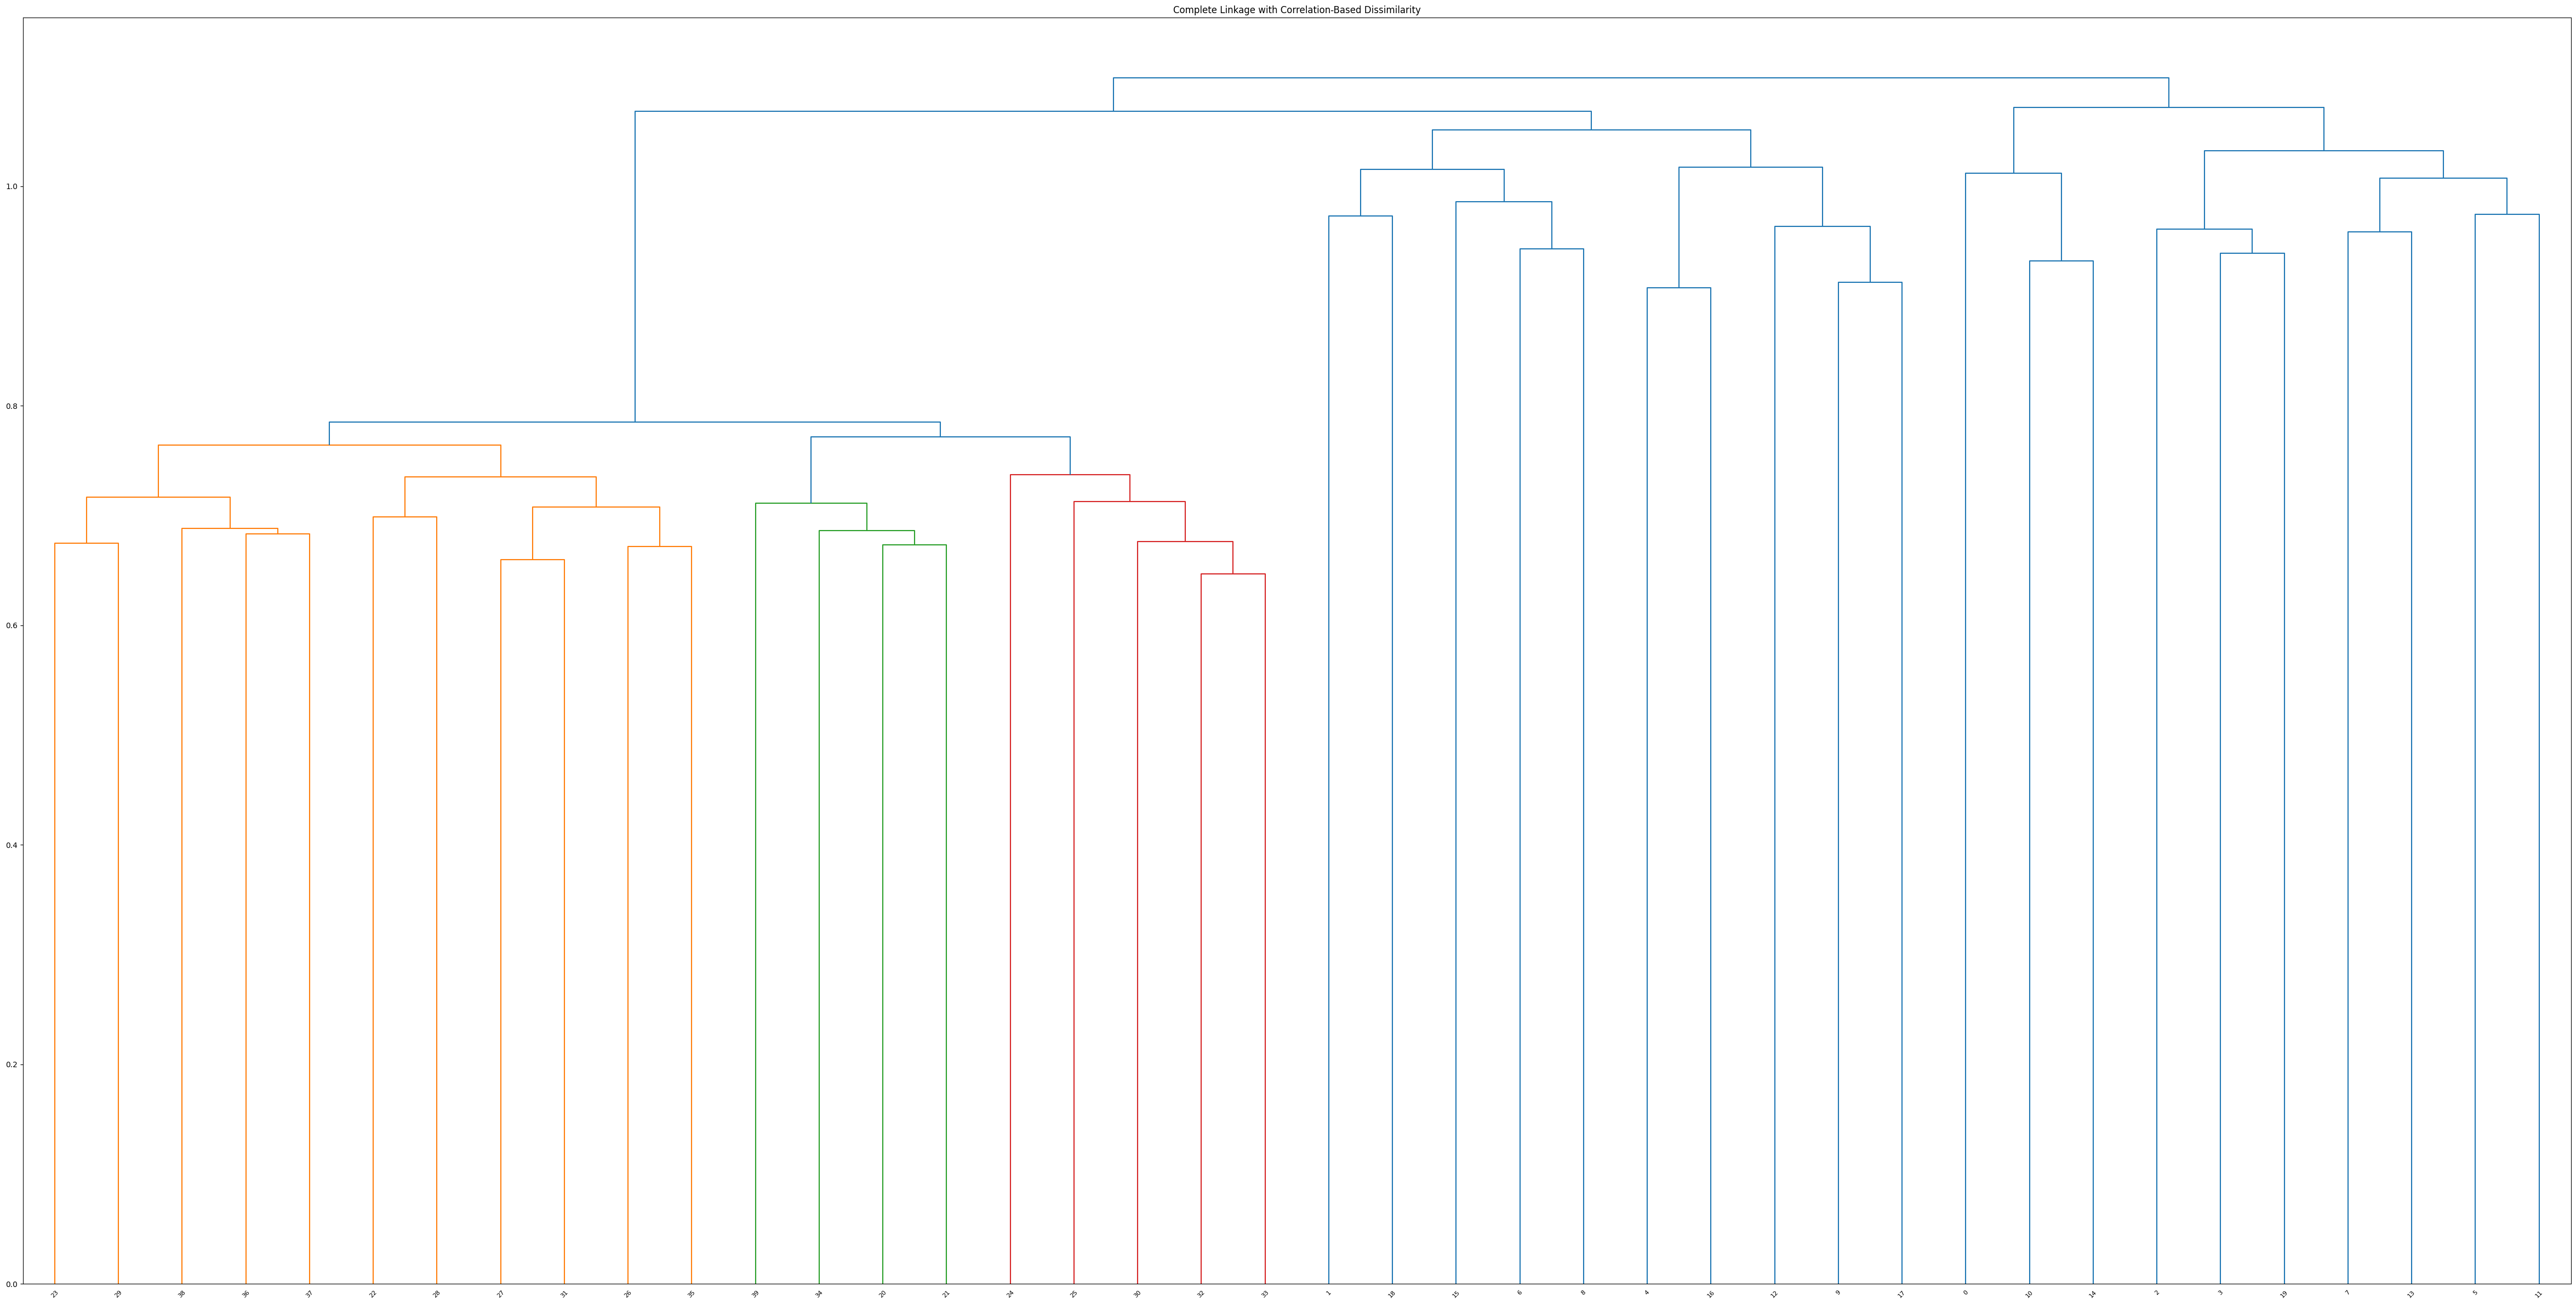

In [33]:
hc_cor1 = AgglomerativeClustering(linkage='complete',
                compute_distances=True,
                n_clusters=2, 
                metric='precomputed')
hc_cor1.fit(matriz_distancias)
linkage_cor = compute_linkage(hc_cor1)
fig, ax = plt.subplots(1, 1, figsize=(60, 30))
dendrogram(linkage_cor , ax=ax)
ax.set_title("Complete Linkage with Correlation-Based Dissimilarity");

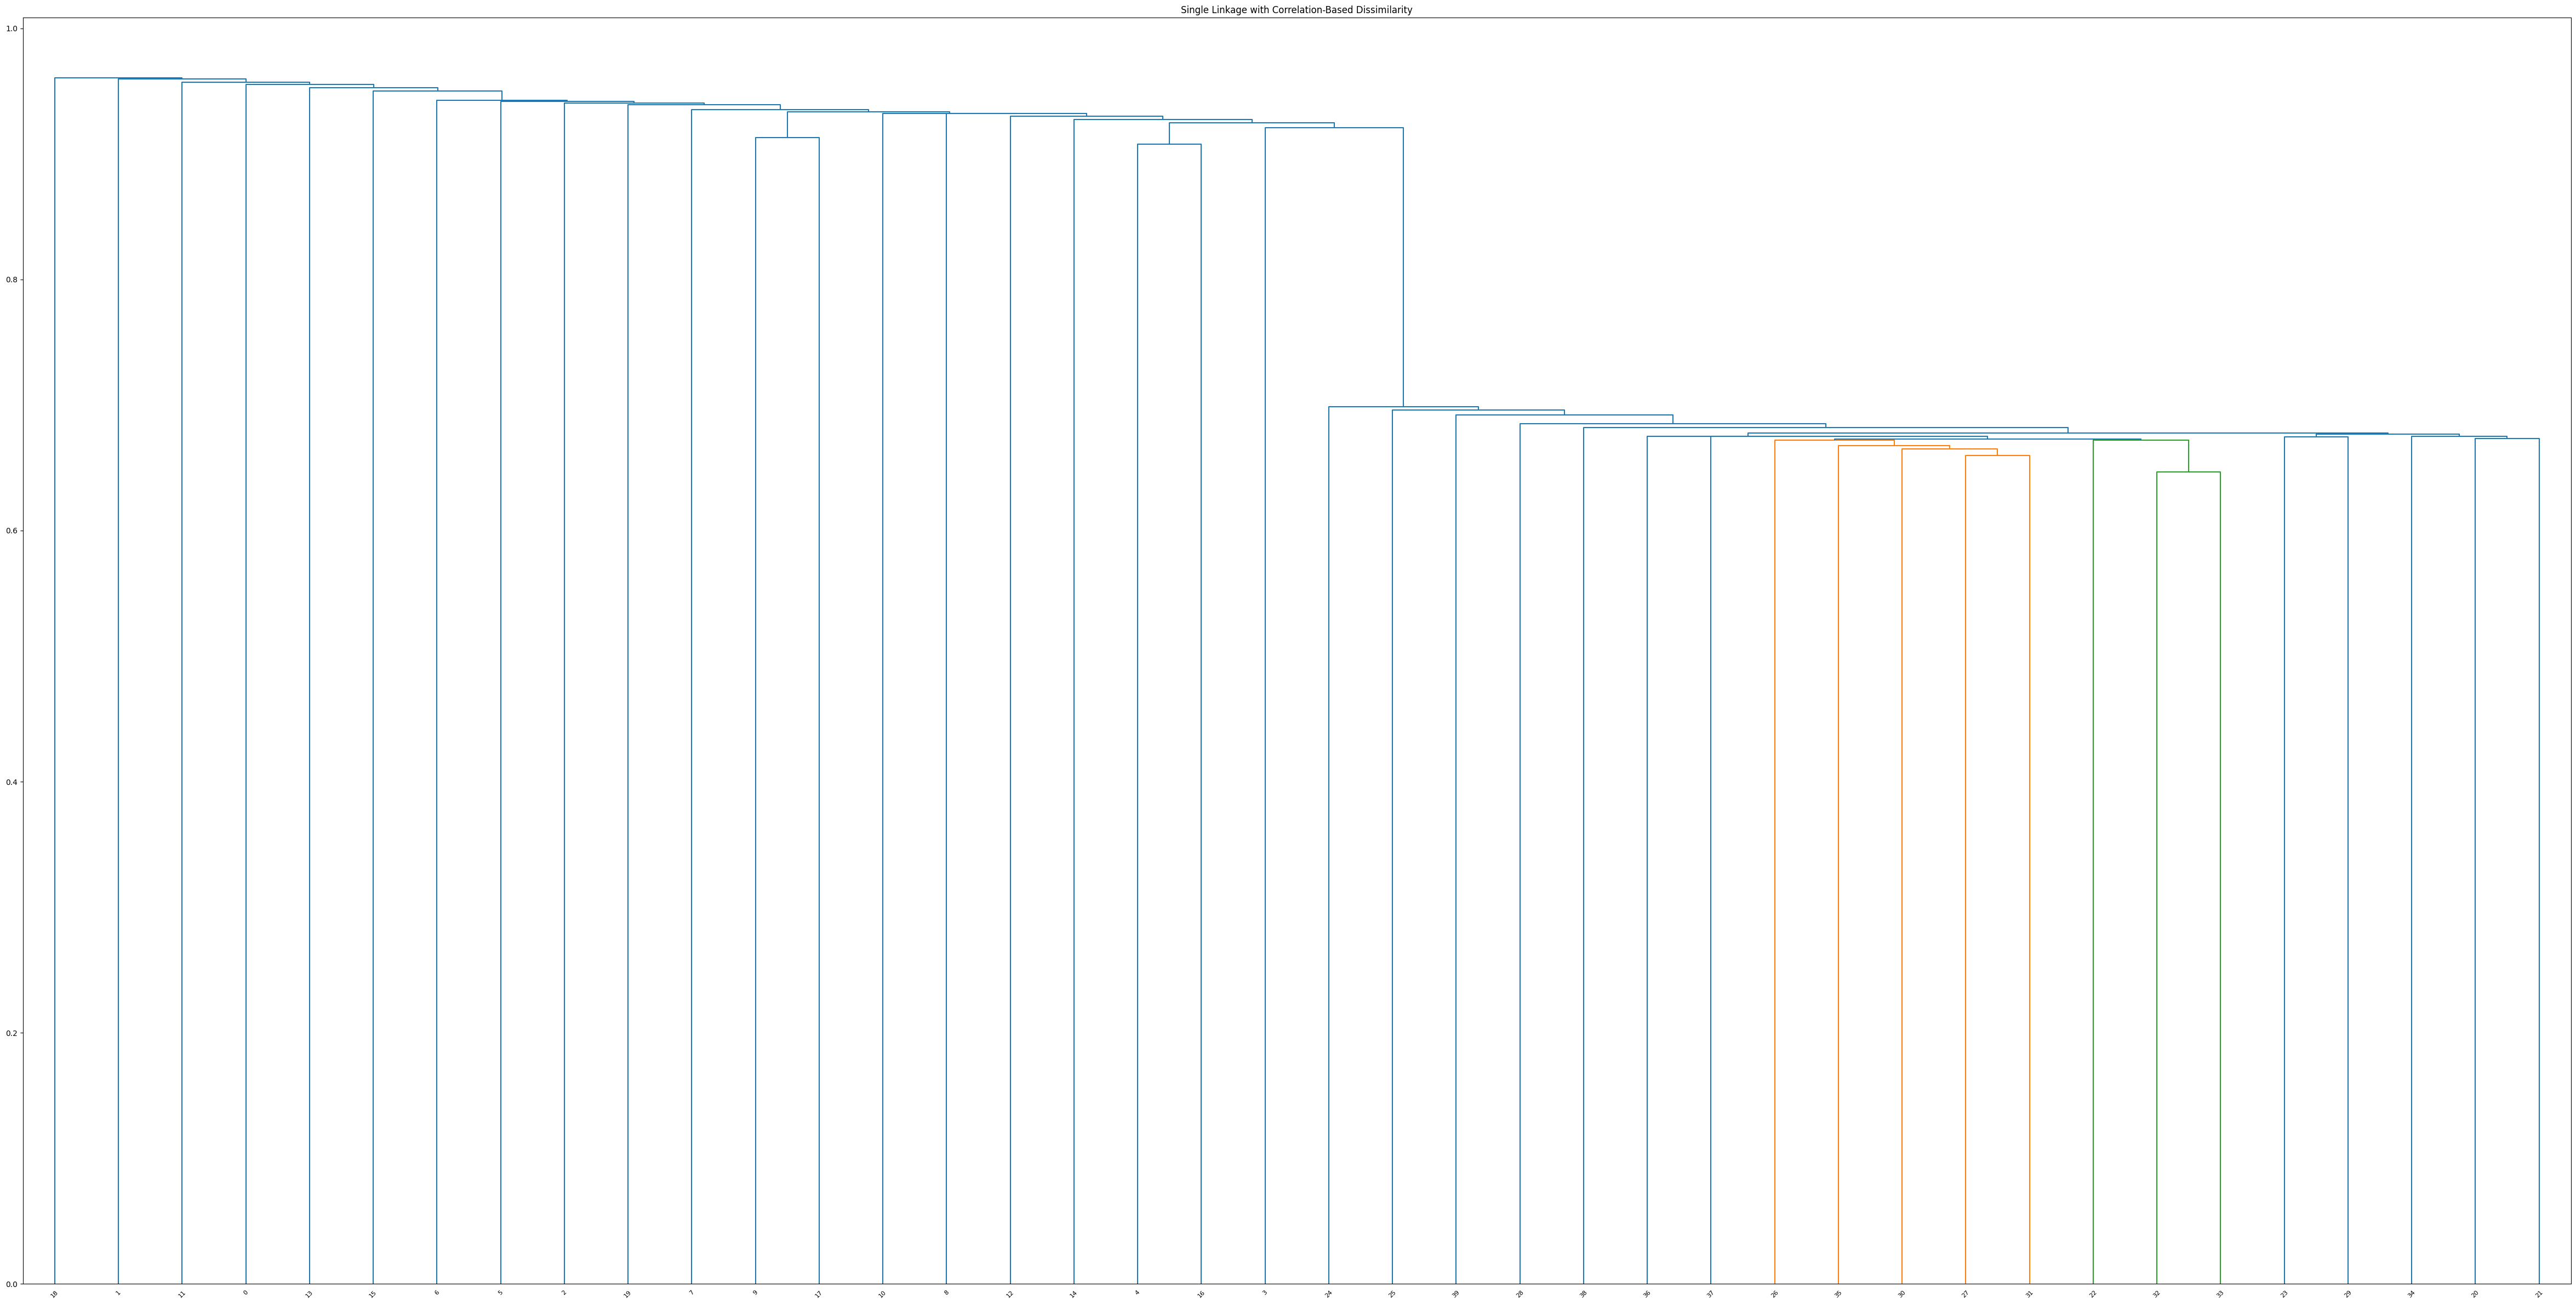

In [34]:
hc_cor2 = AgglomerativeClustering(linkage='single',
                compute_distances=True,
                n_clusters=2, 
                metric='precomputed')
hc_cor2.fit(matriz_distancias)
linkage_cor = compute_linkage(hc_cor2)
fig , ax = plt.subplots(1, 1, figsize=(60, 30))
dendrogram(linkage_cor , ax=ax)
ax.set_title("Single Linkage with Correlation-Based Dissimilarity");

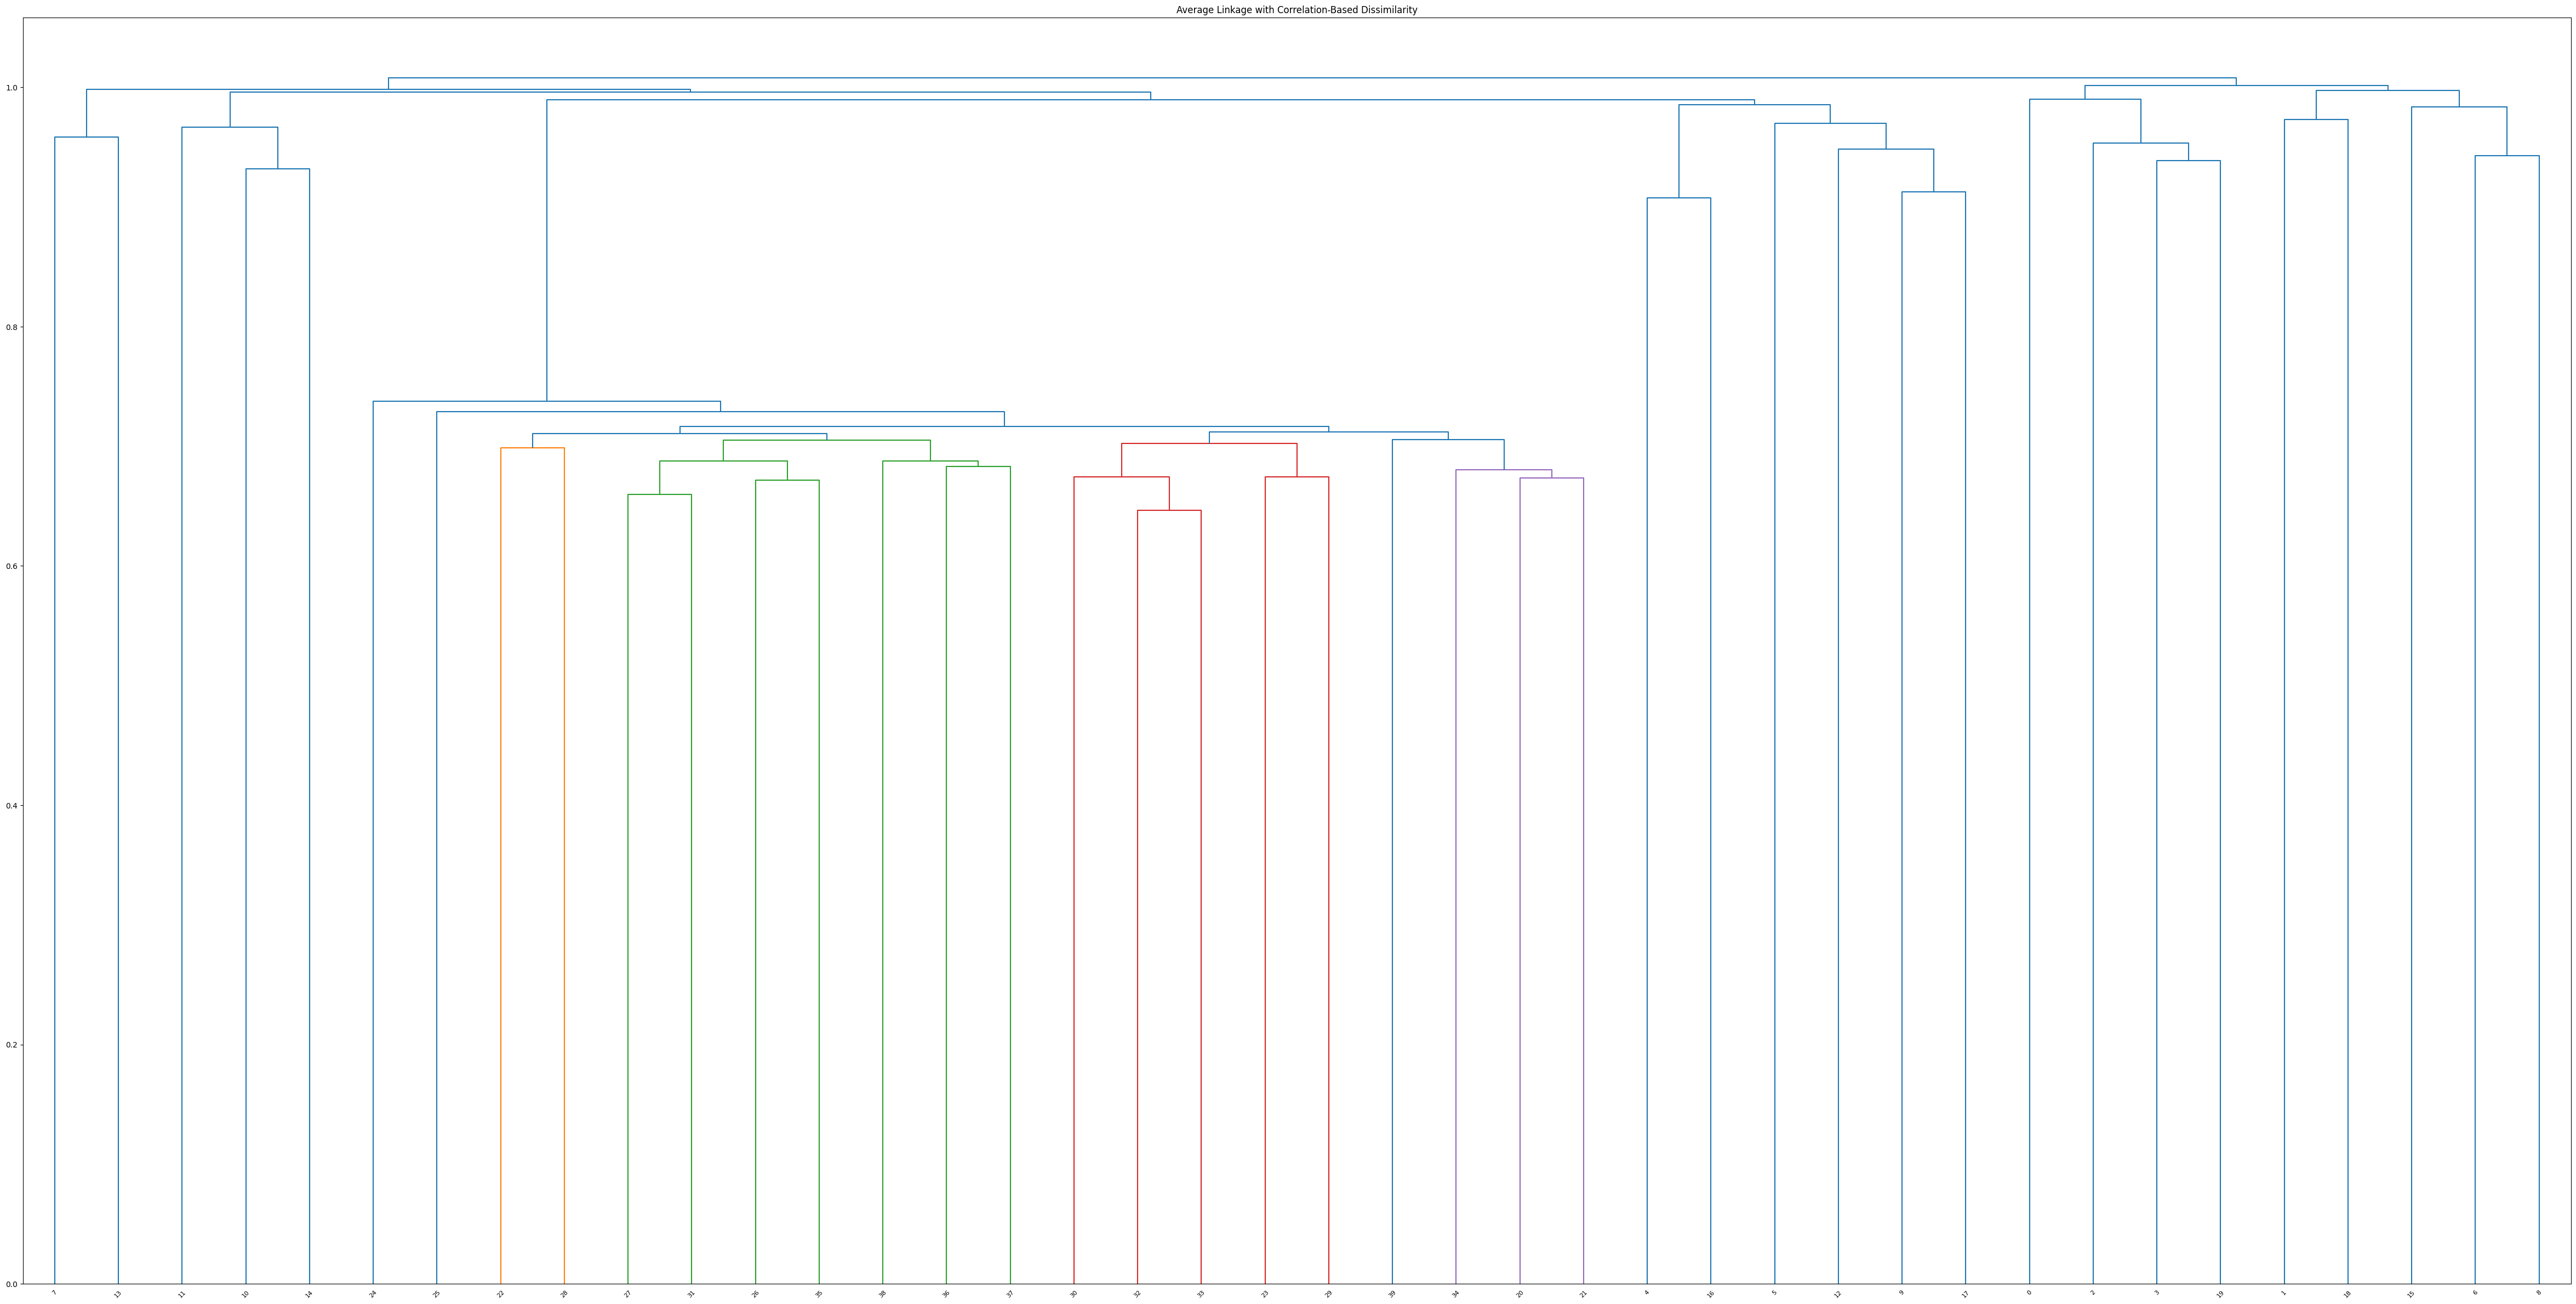

In [35]:
hc_cor3 = AgglomerativeClustering(linkage='average',
                compute_distances=True,
                n_clusters=2, 
                metric='precomputed')
hc_cor3.fit(matriz_distancias)
linkage_cor = compute_linkage(hc_cor3)
fig , ax = plt.subplots(1, 1, figsize=(60, 30))
dendrogram(linkage_cor , ax=ax)
ax.set_title("Average Linkage with Correlation-Based Dissimilarity");

Haciendo uso de los métodos de "complete" y "average" tienden a generar conglomerados más equilibrados que los métodos de "single linkage". En los métodos "complete" y "average" se observa la formación de dos grupos.

## (c) Your collaborator wants to know which genes differ the most across the two groups. Suggest a way to answer this question, and apply it here.

Se plantea para observar que diferencia de expresión genes existe entre los dos grupos un test hipotesis para diferencia entre medias por cada gen. Bajo las siguientes hipótesis:

- Hipotesis nula = las medias del cluster0 es igual al cluster1

- Hipotesis alternativa =las medias del cluster0 es diferente del cluster1


Test de hipotesis para el método "complete"

In [36]:
hc_cor1.labels_

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [37]:
df["cluster"] = hc_cor1.labels_

In [38]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,cluster
0,-0.961933,-0.292526,0.258788,-1.152132,0.195783,0.030124,0.085418,1.116610,-1.218857,1.267369,...,-0.116171,-1.470146,-0.379272,-1.465006,1.075148,-1.226125,-3.056328,1.450658,0.717977,0
1,0.441803,-1.139267,-0.972845,-2.213168,0.593306,-0.691014,-1.113054,1.341700,-1.277279,-0.918349,...,-0.162392,-0.633375,-0.895521,2.034465,3.003267,-0.501702,0.449889,1.310348,0.763482,1
2,-0.975005,0.195837,0.588486,-0.861525,0.282992,-0.403426,-0.677969,0.103278,-0.558925,-1.253500,...,-0.235912,1.446660,-1.127459,0.440849,-0.123441,-0.717430,1.880362,0.383837,0.313576,0
3,1.417504,-1.281121,-0.800258,0.630925,0.247147,-0.729859,-0.562929,0.390963,-1.344493,-1.067114,...,1.597294,0.737478,-0.631248,-0.530442,-1.036740,-0.169113,-0.742841,-0.408860,-0.326473,0
4,0.818815,-0.251439,-1.820398,0.951772,1.978668,-0.364099,0.938194,-1.927491,1.159115,-0.240638,...,-0.086946,-0.122342,1.418029,1.075337,-1.270604,0.599530,2.238346,-0.471111,-0.158700,1


In [39]:
df_cluster0 = df[df["cluster"] == 0]
df_cluster0.drop(["cluster"], axis=1, inplace=True)
df_cluster1 = df[df["cluster"] == 1]
df_cluster1.drop(["cluster"], axis=1, inplace=True)

/var/folders/0t/wjrlj2ln4_z7t_zjzjq9blkw0000gn/T/ipykernel_95166/1500681459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster0.drop(["cluster"], axis=1, inplace=True)
/var/folders/0t/wjrlj2ln4_z7t_zjzjq9blkw0000gn/T/ipykernel_95166/1500681459.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster1.drop(["cluster"], axis=1, inplace=True)


In [40]:
df_cluster0

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-0.961933,-0.292526,0.258788,-1.152132,0.195783,0.030124,0.085418,1.116610,-1.218857,1.267369,...,1.325041,-0.116171,-1.470146,-0.379272,-1.465006,1.075148,-1.226125,-3.056328,1.450658,0.717977
2,-0.975005,0.195837,0.588486,-0.861525,0.282992,-0.403426,-0.677969,0.103278,-0.558925,-1.253500,...,-0.435533,-0.235912,1.446660,-1.127459,0.440849,-0.123441,-0.717430,1.880362,0.383837,0.313576
3,1.417504,-1.281121,-0.800258,0.630925,0.247147,-0.729859,-0.562929,0.390963,-1.344493,-1.067114,...,-3.065529,1.597294,0.737478,-0.631248,-0.530442,-1.036740,-0.169113,-0.742841,-0.408860,-0.326473
5,0.316294,2.511997,-2.058924,-1.165724,-0.871018,1.125349,0.118809,0.451692,-1.501044,1.163889,...,0.101693,1.019600,-0.553600,0.731371,0.298128,-1.277029,-0.997987,-0.291738,-1.392396,0.468113
7,-0.063966,0.059543,1.592124,1.063619,-1.032253,-0.806130,0.685073,0.625336,0.691499,0.949329,...,-0.603931,-0.581503,-0.346134,-0.083600,0.191902,1.249723,0.200508,0.696415,0.210900,-0.427099
10,-0.722730,-0.115765,-0.187579,-0.243219,1.650957,-0.272064,-0.488366,-0.304619,0.195527,1.576088,...,-0.189856,-0.016484,0.175246,0.097714,-0.307409,0.137414,0.032998,1.560240,0.820755,-1.037164
11,-0.281955,0.825978,-1.500163,-0.433034,-1.744909,2.176562,-0.741054,0.985715,1.378114,0.916068,...,0.210086,0.529153,0.204599,-0.042698,-1.445376,-0.545526,-1.902298,1.698944,-0.748894,-1.530438
13,0.701980,-0.569549,0.855989,-0.057897,-0.679826,-1.025781,-0.749054,2.017286,0.804883,0.140770,...,0.425689,0.684255,-0.730480,-0.810308,0.286564,-0.115167,-1.046251,-0.807240,-0.509583,0.300096
14,1.007616,-0.131537,1.249855,-1.397762,-2.131584,0.298158,0.854232,-0.605265,0.740193,-1.672722,...,0.230818,0.640030,-1.503089,0.314016,-0.000341,-0.188576,0.665139,-1.146654,1.071049,-0.643579
19,-0.220045,-0.525504,0.551440,2.019194,-0.097723,0.670965,-0.142455,0.072211,-0.411758,-0.502616,...,-0.197562,-0.586523,-0.140592,-0.413133,1.882245,-0.488302,1.380388,-1.797123,-0.413003,-0.442702


In [41]:
df_cluster1

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
1,0.441803,-1.139267,-0.972845,-2.213168,0.593306,-0.691014,-1.113054,1.341700,-1.277279,-0.918349,...,0.740838,-0.162392,-0.633375,-0.895521,2.034465,3.003267,-0.501702,0.449889,1.310348,0.763482
4,0.818815,-0.251439,-1.820398,0.951772,1.978668,-0.364099,0.938194,-1.927491,1.159115,-0.240638,...,-2.378938,-0.086946,-0.122342,1.418029,1.075337,-1.270604,0.599530,2.238346,-0.471111,-0.158700
6,-0.024967,-0.922206,-0.064764,-0.391559,-0.989715,-1.404041,-2.192225,-1.345070,-0.554120,0.565089,...,0.263076,0.583638,1.779488,0.636580,2.515097,-0.278504,0.028236,1.270233,-0.805808,0.519161
8,0.031497,-1.409645,-0.173117,-0.350009,-1.109654,-1.237924,0.262304,0.816305,-0.881673,2.372266,...,-0.427227,-0.127644,1.196953,1.078757,0.325376,-0.706994,-1.364865,1.242857,1.727079,2.759068
9,-0.350311,-0.656712,-0.121087,-1.489058,-0.385142,0.577602,-1.229459,-0.358081,0.454120,1.706587,...,-0.205602,-0.105960,-0.181468,-0.539269,0.790791,-0.704671,0.564957,0.429148,0.862870,-2.571514
12,1.337515,0.346450,-1.228737,-0.038791,-0.378885,1.436407,0.253504,-0.773110,-0.370561,0.264296,...,1.726559,1.320573,1.407051,0.956756,-0.462178,1.237348,-0.437141,-2.109933,1.560224,1.692381
15,-0.465383,0.690229,-0.898081,-0.156187,-0.230172,-0.555966,0.354744,0.520390,0.070931,1.568677,...,0.146904,0.252300,-1.305663,0.345203,-0.271390,-0.335445,-0.443117,-2.119410,-0.969547,0.056759
16,0.638595,-0.909038,0.870206,-2.735982,0.466124,0.204653,2.651606,0.266984,0.122554,-0.390499,...,0.682763,-0.558269,-1.278102,1.403212,0.986357,-1.039042,0.179952,-1.382769,-1.436005,-1.265215
17,0.286781,1.302642,-0.225253,0.775617,-1.800449,-1.191648,-0.303511,0.318984,0.012029,0.226263,...,0.615246,-0.099880,1.145779,0.178372,0.493799,2.098071,-0.504088,0.975307,0.424573,0.278177
18,-0.227078,-1.672695,0.450289,0.614156,0.626290,0.235092,-1.686913,-0.347158,-0.625985,1.324377,...,-0.715490,0.225333,0.771537,0.439871,-0.143558,1.189881,-0.297914,-0.815841,-0.688211,-0.499156


In [42]:
# Realiza la prueba t de Student para cada columna
p_values = []

for columna in df_cluster1.columns:
    stat, p_value = ttest_ind(df_cluster1[columna], df_cluster0[columna])
    p_values.append(p_value)

# Ahora, p_values contiene los p-values resultantes de las pruebas t
# Puedes ajustar el nivel de significancia según tus necesidades
nivel_de_significancia = 0.05
columnas_significativas = [columna for columna, p_value in zip(df_cluster1.columns, p_values) if p_value < nivel_de_significancia]

# Muestra las columnas significativas
print("Columnas significativas:")
print(f"Numero de columnas diferentes: {len(columnas_significativas)}")
print(columnas_significativas)

Columnas significativas:
Numero de columnas diferentes: 139
[10, 11, 12, 14, 15, 16, 17, 18, 32, 34, 44, 51, 69, 87, 103, 123, 136, 154, 171, 191, 259, 265, 280, 305, 312, 315, 330, 377, 400, 409, 447, 452, 459, 461, 489, 498, 500, 501, 502, 503, 504, 505, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 519, 520, 521, 522, 523, 525, 526, 527, 528, 531, 532, 534, 535, 536, 537, 539, 540, 541, 542, 543, 544, 545, 547, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 567, 568, 569, 570, 571, 572, 574, 575, 577, 578, 579, 581, 582, 583, 584, 585, 586, 587, 588, 589, 591, 592, 593, 594, 595, 596, 597, 598, 599, 614, 635, 646, 660, 688, 709, 733, 737, 778, 779, 805, 813, 851, 923, 944, 961, 966, 974]


Test de hipotesis para el método "single"

In [43]:
hc_cor2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [44]:
df["cluster"] = hc_cor2.labels_

In [45]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,cluster
0,-0.961933,-0.292526,0.258788,-1.152132,0.195783,0.030124,0.085418,1.116610,-1.218857,1.267369,...,-0.116171,-1.470146,-0.379272,-1.465006,1.075148,-1.226125,-3.056328,1.450658,0.717977,0
1,0.441803,-1.139267,-0.972845,-2.213168,0.593306,-0.691014,-1.113054,1.341700,-1.277279,-0.918349,...,-0.162392,-0.633375,-0.895521,2.034465,3.003267,-0.501702,0.449889,1.310348,0.763482,0
2,-0.975005,0.195837,0.588486,-0.861525,0.282992,-0.403426,-0.677969,0.103278,-0.558925,-1.253500,...,-0.235912,1.446660,-1.127459,0.440849,-0.123441,-0.717430,1.880362,0.383837,0.313576,0
3,1.417504,-1.281121,-0.800258,0.630925,0.247147,-0.729859,-0.562929,0.390963,-1.344493,-1.067114,...,1.597294,0.737478,-0.631248,-0.530442,-1.036740,-0.169113,-0.742841,-0.408860,-0.326473,0
4,0.818815,-0.251439,-1.820398,0.951772,1.978668,-0.364099,0.938194,-1.927491,1.159115,-0.240638,...,-0.086946,-0.122342,1.418029,1.075337,-1.270604,0.599530,2.238346,-0.471111,-0.158700,0


In [46]:
df_cluster0 = df[df["cluster"] == 0]
df_cluster0.drop(["cluster"], axis=1, inplace=True)
df_cluster1 = df[df["cluster"] == 1]
df_cluster1.drop(["cluster"], axis=1, inplace=True)

/var/folders/0t/wjrlj2ln4_z7t_zjzjq9blkw0000gn/T/ipykernel_95166/1500681459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster0.drop(["cluster"], axis=1, inplace=True)
/var/folders/0t/wjrlj2ln4_z7t_zjzjq9blkw0000gn/T/ipykernel_95166/1500681459.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster1.drop(["cluster"], axis=1, inplace=True)


In [47]:
df_cluster0

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-0.961933,-0.292526,0.258788,-1.152132,0.195783,0.030124,0.085418,1.116610,-1.218857,1.267369,...,1.325041,-0.116171,-1.470146,-0.379272,-1.465006,1.075148,-1.226125,-3.056328,1.450658,0.717977
1,0.441803,-1.139267,-0.972845,-2.213168,0.593306,-0.691014,-1.113054,1.341700,-1.277279,-0.918349,...,0.740838,-0.162392,-0.633375,-0.895521,2.034465,3.003267,-0.501702,0.449889,1.310348,0.763482
2,-0.975005,0.195837,0.588486,-0.861525,0.282992,-0.403426,-0.677969,0.103278,-0.558925,-1.253500,...,-0.435533,-0.235912,1.446660,-1.127459,0.440849,-0.123441,-0.717430,1.880362,0.383837,0.313576
3,1.417504,-1.281121,-0.800258,0.630925,0.247147,-0.729859,-0.562929,0.390963,-1.344493,-1.067114,...,-3.065529,1.597294,0.737478,-0.631248,-0.530442,-1.036740,-0.169113,-0.742841,-0.408860,-0.326473
4,0.818815,-0.251439,-1.820398,0.951772,1.978668,-0.364099,0.938194,-1.927491,1.159115,-0.240638,...,-2.378938,-0.086946,-0.122342,1.418029,1.075337,-1.270604,0.599530,2.238346,-0.471111,-0.158700
5,0.316294,2.511997,-2.058924,-1.165724,-0.871018,1.125349,0.118809,0.451692,-1.501044,1.163889,...,0.101693,1.019600,-0.553600,0.731371,0.298128,-1.277029,-0.997987,-0.291738,-1.392396,0.468113
6,-0.024967,-0.922206,-0.064764,-0.391559,-0.989715,-1.404041,-2.192225,-1.345070,-0.554120,0.565089,...,0.263076,0.583638,1.779488,0.636580,2.515097,-0.278504,0.028236,1.270233,-0.805808,0.519161
7,-0.063966,0.059543,1.592124,1.063619,-1.032253,-0.806130,0.685073,0.625336,0.691499,0.949329,...,-0.603931,-0.581503,-0.346134,-0.083600,0.191902,1.249723,0.200508,0.696415,0.210900,-0.427099
8,0.031497,-1.409645,-0.173117,-0.350009,-1.109654,-1.237924,0.262304,0.816305,-0.881673,2.372266,...,-0.427227,-0.127644,1.196953,1.078757,0.325376,-0.706994,-1.364865,1.242857,1.727079,2.759068
9,-0.350311,-0.656712,-0.121087,-1.489058,-0.385142,0.577602,-1.229459,-0.358081,0.454120,1.706587,...,-0.205602,-0.105960,-0.181468,-0.539269,0.790791,-0.704671,0.564957,0.429148,0.862870,-2.571514


In [48]:
df_cluster1

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
18,-0.227078,-1.672695,0.450289,0.614156,0.62629,0.235092,-1.686913,-0.347158,-0.625985,1.324377,...,-0.71549,0.225333,0.771537,0.439871,-0.143558,1.189881,-0.297914,-0.815841,-0.688211,-0.499156


In [49]:
# Realiza la prueba t de Student para cada columna
p_values = []

for columna in df_cluster1.columns:
    stat, p_value = ttest_ind(df_cluster1[columna], df_cluster0[columna])
    p_values.append(p_value)

# Ahora, p_values contiene los p-values resultantes de las pruebas t
# Puedes ajustar el nivel de significancia según tus necesidades
nivel_de_significancia = 0.05
columnas_significativas = [columna for columna, p_value in zip(df_cluster1.columns, p_values) if p_value < nivel_de_significancia]

# Muestra las columnas significativas
print("Columnas significativas:")
print(f"Numero de columnas diferentes: {len(columnas_significativas)}")
print(columnas_significativas)

Columnas significativas:
Numero de columnas diferentes: 59
[13, 64, 70, 94, 98, 112, 119, 162, 172, 213, 229, 261, 290, 297, 332, 347, 352, 362, 405, 411, 413, 465, 480, 523, 538, 541, 545, 548, 634, 639, 641, 642, 648, 663, 671, 688, 710, 767, 771, 780, 785, 805, 807, 828, 837, 854, 859, 860, 867, 878, 882, 884, 888, 910, 915, 920, 956, 984, 988]


Test de hipotesis para el método "average"

In [50]:
hc_cor3.labels_

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [51]:
df["cluster"] = hc_cor3.labels_

In [52]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,cluster
0,-0.961933,-0.292526,0.258788,-1.152132,0.195783,0.030124,0.085418,1.116610,-1.218857,1.267369,...,-0.116171,-1.470146,-0.379272,-1.465006,1.075148,-1.226125,-3.056328,1.450658,0.717977,0
1,0.441803,-1.139267,-0.972845,-2.213168,0.593306,-0.691014,-1.113054,1.341700,-1.277279,-0.918349,...,-0.162392,-0.633375,-0.895521,2.034465,3.003267,-0.501702,0.449889,1.310348,0.763482,0
2,-0.975005,0.195837,0.588486,-0.861525,0.282992,-0.403426,-0.677969,0.103278,-0.558925,-1.253500,...,-0.235912,1.446660,-1.127459,0.440849,-0.123441,-0.717430,1.880362,0.383837,0.313576,0
3,1.417504,-1.281121,-0.800258,0.630925,0.247147,-0.729859,-0.562929,0.390963,-1.344493,-1.067114,...,1.597294,0.737478,-0.631248,-0.530442,-1.036740,-0.169113,-0.742841,-0.408860,-0.326473,0
4,0.818815,-0.251439,-1.820398,0.951772,1.978668,-0.364099,0.938194,-1.927491,1.159115,-0.240638,...,-0.086946,-0.122342,1.418029,1.075337,-1.270604,0.599530,2.238346,-0.471111,-0.158700,1


In [53]:
df_cluster0 = df[df["cluster"] == 0]
df_cluster0.drop(["cluster"], axis=1, inplace=True)
df_cluster1 = df[df["cluster"] == 1]
df_cluster1.drop(["cluster"], axis=1, inplace=True)

/var/folders/0t/wjrlj2ln4_z7t_zjzjq9blkw0000gn/T/ipykernel_95166/1500681459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster0.drop(["cluster"], axis=1, inplace=True)
/var/folders/0t/wjrlj2ln4_z7t_zjzjq9blkw0000gn/T/ipykernel_95166/1500681459.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster1.drop(["cluster"], axis=1, inplace=True)


In [54]:
df_cluster0

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-0.961933,-0.292526,0.258788,-1.152132,0.195783,0.030124,0.085418,1.116610,-1.218857,1.267369,...,1.325041,-0.116171,-1.470146,-0.379272,-1.465006,1.075148,-1.226125,-3.056328,1.450658,0.717977
1,0.441803,-1.139267,-0.972845,-2.213168,0.593306,-0.691014,-1.113054,1.341700,-1.277279,-0.918349,...,0.740838,-0.162392,-0.633375,-0.895521,2.034465,3.003267,-0.501702,0.449889,1.310348,0.763482
2,-0.975005,0.195837,0.588486,-0.861525,0.282992,-0.403426,-0.677969,0.103278,-0.558925,-1.253500,...,-0.435533,-0.235912,1.446660,-1.127459,0.440849,-0.123441,-0.717430,1.880362,0.383837,0.313576
3,1.417504,-1.281121,-0.800258,0.630925,0.247147,-0.729859,-0.562929,0.390963,-1.344493,-1.067114,...,-3.065529,1.597294,0.737478,-0.631248,-0.530442,-1.036740,-0.169113,-0.742841,-0.408860,-0.326473
6,-0.024967,-0.922206,-0.064764,-0.391559,-0.989715,-1.404041,-2.192225,-1.345070,-0.554120,0.565089,...,0.263076,0.583638,1.779488,0.636580,2.515097,-0.278504,0.028236,1.270233,-0.805808,0.519161
8,0.031497,-1.409645,-0.173117,-0.350009,-1.109654,-1.237924,0.262304,0.816305,-0.881673,2.372266,...,-0.427227,-0.127644,1.196953,1.078757,0.325376,-0.706994,-1.364865,1.242857,1.727079,2.759068
15,-0.465383,0.690229,-0.898081,-0.156187,-0.230172,-0.555966,0.354744,0.520390,0.070931,1.568677,...,0.146904,0.252300,-1.305663,0.345203,-0.271390,-0.335445,-0.443117,-2.119410,-0.969547,0.056759
18,-0.227078,-1.672695,0.450289,0.614156,0.626290,0.235092,-1.686913,-0.347158,-0.625985,1.324377,...,-0.715490,0.225333,0.771537,0.439871,-0.143558,1.189881,-0.297914,-0.815841,-0.688211,-0.499156
19,-0.220045,-0.525504,0.551440,2.019194,-0.097723,0.670965,-0.142455,0.072211,-0.411758,-0.502616,...,-0.197562,-0.586523,-0.140592,-0.413133,1.882245,-0.488302,1.380388,-1.797123,-0.413003,-0.442702


In [55]:
df_cluster1

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
4,0.818815,-0.251439,-1.820398,0.951772,1.978668,-0.364099,0.938194,-1.927491,1.159115,-0.240638,...,-2.378938,-0.086946,-0.122342,1.418029,1.075337,-1.270604,0.599530,2.238346,-0.471111,-0.158700
5,0.316294,2.511997,-2.058924,-1.165724,-0.871018,1.125349,0.118809,0.451692,-1.501044,1.163889,...,0.101693,1.019600,-0.553600,0.731371,0.298128,-1.277029,-0.997987,-0.291738,-1.392396,0.468113
7,-0.063966,0.059543,1.592124,1.063619,-1.032253,-0.806130,0.685073,0.625336,0.691499,0.949329,...,-0.603931,-0.581503,-0.346134,-0.083600,0.191902,1.249723,0.200508,0.696415,0.210900,-0.427099
9,-0.350311,-0.656712,-0.121087,-1.489058,-0.385142,0.577602,-1.229459,-0.358081,0.454120,1.706587,...,-0.205602,-0.105960,-0.181468,-0.539269,0.790791,-0.704671,0.564957,0.429148,0.862870,-2.571514
10,-0.722730,-0.115765,-0.187579,-0.243219,1.650957,-0.272064,-0.488366,-0.304619,0.195527,1.576088,...,-0.189856,-0.016484,0.175246,0.097714,-0.307409,0.137414,0.032998,1.560240,0.820755,-1.037164
11,-0.281955,0.825978,-1.500163,-0.433034,-1.744909,2.176562,-0.741054,0.985715,1.378114,0.916068,...,0.210086,0.529153,0.204599,-0.042698,-1.445376,-0.545526,-1.902298,1.698944,-0.748894,-1.530438
12,1.337515,0.346450,-1.228737,-0.038791,-0.378885,1.436407,0.253504,-0.773110,-0.370561,0.264296,...,1.726559,1.320573,1.407051,0.956756,-0.462178,1.237348,-0.437141,-2.109933,1.560224,1.692381
13,0.701980,-0.569549,0.855989,-0.057897,-0.679826,-1.025781,-0.749054,2.017286,0.804883,0.140770,...,0.425689,0.684255,-0.730480,-0.810308,0.286564,-0.115167,-1.046251,-0.807240,-0.509583,0.300096
14,1.007616,-0.131537,1.249855,-1.397762,-2.131584,0.298158,0.854232,-0.605265,0.740193,-1.672722,...,0.230818,0.640030,-1.503089,0.314016,-0.000341,-0.188576,0.665139,-1.146654,1.071049,-0.643579
16,0.638595,-0.909038,0.870206,-2.735982,0.466124,0.204653,2.651606,0.266984,0.122554,-0.390499,...,0.682763,-0.558269,-1.278102,1.403212,0.986357,-1.039042,0.179952,-1.382769,-1.436005,-1.265215


In [56]:
# Realiza la prueba t de Student para cada columna
p_values = []

for columna in df_cluster1.columns:
    stat, p_value = ttest_ind(df_cluster1[columna], df_cluster0[columna])
    p_values.append(p_value)

# Ahora, p_values contiene los p-values resultantes de las pruebas t
# Puedes ajustar el nivel de significancia según tus necesidades
nivel_de_significancia = 0.05
columnas_significativas = [columna for columna, p_value in zip(df_cluster1.columns, p_values) if p_value < nivel_de_significancia]

# Muestra las columnas significativas
print("Columnas significativas:")
print(f"Numero de columnas diferentes: {len(columnas_significativas)}")
print(columnas_significativas)

Columnas significativas:
Numero de columnas diferentes: 154
[5, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 36, 75, 78, 84, 97, 123, 142, 163, 213, 218, 223, 287, 298, 302, 330, 331, 350, 359, 362, 363, 381, 382, 418, 447, 451, 456, 458, 461, 490, 492, 500, 501, 502, 503, 504, 505, 506, 507, 508, 510, 511, 513, 514, 515, 516, 518, 519, 520, 521, 522, 524, 525, 527, 528, 529, 531, 532, 534, 535, 537, 538, 539, 540, 543, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 562, 564, 565, 566, 567, 568, 569, 570, 571, 573, 576, 577, 581, 583, 584, 585, 587, 588, 589, 591, 593, 594, 596, 598, 599, 612, 616, 620, 633, 642, 648, 650, 663, 674, 677, 679, 685, 695, 708, 724, 735, 797, 804, 828, 835, 841, 846, 854, 859, 864, 893, 894, 899, 900, 930, 934, 938, 953, 956, 984, 985, 988, 999]


Al comparar los tres métodos de "linking" tenemos que se expresan diferencialmente el siguiente número de genes:
Complete = 139
Single = 59
Average = 154